This notebook has codes to perform the following tasks:

1) Import datasets from Kaggle

2) Loading CITE-Seq files 

3) Implementation of SVD on CITE-Seq files to reduce sparcity of the dataset from 22050 to 240 columns

4) Build and train an encoder-decoder model that we were able to source from a Kaggle competition notebook 

(In our notebook, we encoded 240 dimensions to 60 and then decoded the 60 dimensions to match the target dimensions of 140; whereas the kaggle notebook performed 240->120->60->30 : 30->70->140.)

Source: https://www.kaggle.com/code/ravishah1/citeseq-rna-to-protein-encoder-decoder-nn/notebook#Predict-&-Submit

5) Three regression models (Ridge Regression, ElasticNet Regression, Lasso Regression)

## Importing datasets from Kaggle

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

In [ ]:
!kaggle competitions download -c open-problems-multimodal

100% 18.1G/18.1G [02:33<00:00, 155MB/s]
100% 18.1G/18.1G [02:34<00:00, 126MB/s]


In [ ]:
! unzip open-problems-multimodal.zip

Archive:  open-problems-multimodal.zip
  inflating: evaluation_ids.csv      
  inflating: metadata.csv            
  inflating: metadata_cite_day_2_donor_27678.csv  
  inflating: sample_submission.csv   
  inflating: test_cite_inputs.h5     
  inflating: test_cite_inputs_day_2_donor_27678.h5  
  inflating: test_multi_inputs.h5    
  inflating: train_cite_inputs.h5    
  inflating: train_cite_targets.h5   
  inflating: train_multi_inputs.h5   
  inflating: train_multi_targets.h5  


In [ ]:
import pandas as pd

In [ ]:
meta = pd.read_csv('/content/metadata.csv')

In [ ]:
meta

,cell_id,day,donor,cell_type,technology
0,c2150f55becb,2,27678,HSC,citeseq
1,65b7edf8a4da,2,27678,HSC,citeseq
2,c1b26cb1057b,2,27678,EryP,citeseq
3,917168fa6f83,2,27678,NeuP,citeseq
4,2b29feeca86d,2,27678,EryP,citeseq
...,...,...,...,...,...
281523,96a60b026659,10,31800,hidden,multiome
281524,d493e546991e,10,31800,hidden,multiome
281525,05666c99aa48,10,31800,hidden,multiome
281526,121f946642b5,10,31800,hidden,multiome


In [ ]:
meta_day2 = pd.read_csv('/content/metadata_cite_day_2_donor_27678.csv')

In [ ]:
meta_day2

,cell_id,day,donor,cell_type,technology
0,83d6659a6a32,2,27678,NeuP,citeseq
1,d98594f13d2e,2,27678,NeuP,citeseq
2,5f93d8ffc72f,2,27678,NeuP,citeseq
3,7dfa2699d351,2,27678,EryP,citeseq
4,6d2533edd0e0,2,27678,HSC,citeseq
...,...,...,...,...,...
7011,be92120b3a00,2,27678,HSC,citeseq
7012,396d0c31d41c,2,27678,HSC,citeseq
7013,ef6bf272cdcf,2,27678,EryP,citeseq
7014,6339da0de3a0,2,27678,HSC,citeseq


In [ ]:
%ls 

evaluation_ids.csv                   test_cite_inputs_day_2_donor_27678.h5
kaggle.json                          test_cite_inputs.h5
metadata_cite_day_2_donor_27678.csv  test_multi_inputs.h5
metadata.csv                         train_cite_inputs.h5
open-problems-multimodal.zip         train_cite_targets.h5
sample_data/                         train_multi_inputs.h5
sample_submission.csv                train_multi_targets.h5


## Loading CITE-seq Files 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# set paths
DATA_DIR = Path("/content/drive/MyDrive/Genomic Info Sci Project (Fall '22)/Datasets")
FP_CELL_METADATA = Path(DATA_DIR/"metadata.csv")
FP_CITE_TRAIN_INPUTS = Path(DATA_DIR/"train_cite_inputs.h5")
FP_CITE_TRAIN_TARGETS = Path(DATA_DIR/"train_cite_targets.h5")

In [ ]:
df_cite_train_x = pd.read_hdf(FP_CITE_TRAIN_INPUTS)
df_cite_train_x.shape

(70988, 22050)

In [ ]:
df_cite_train_y = pd.read_hdf(FP_CITE_TRAIN_TARGETS)
df_cite_train_y.shape

(70988, 140)

## SVD for CITE-seq

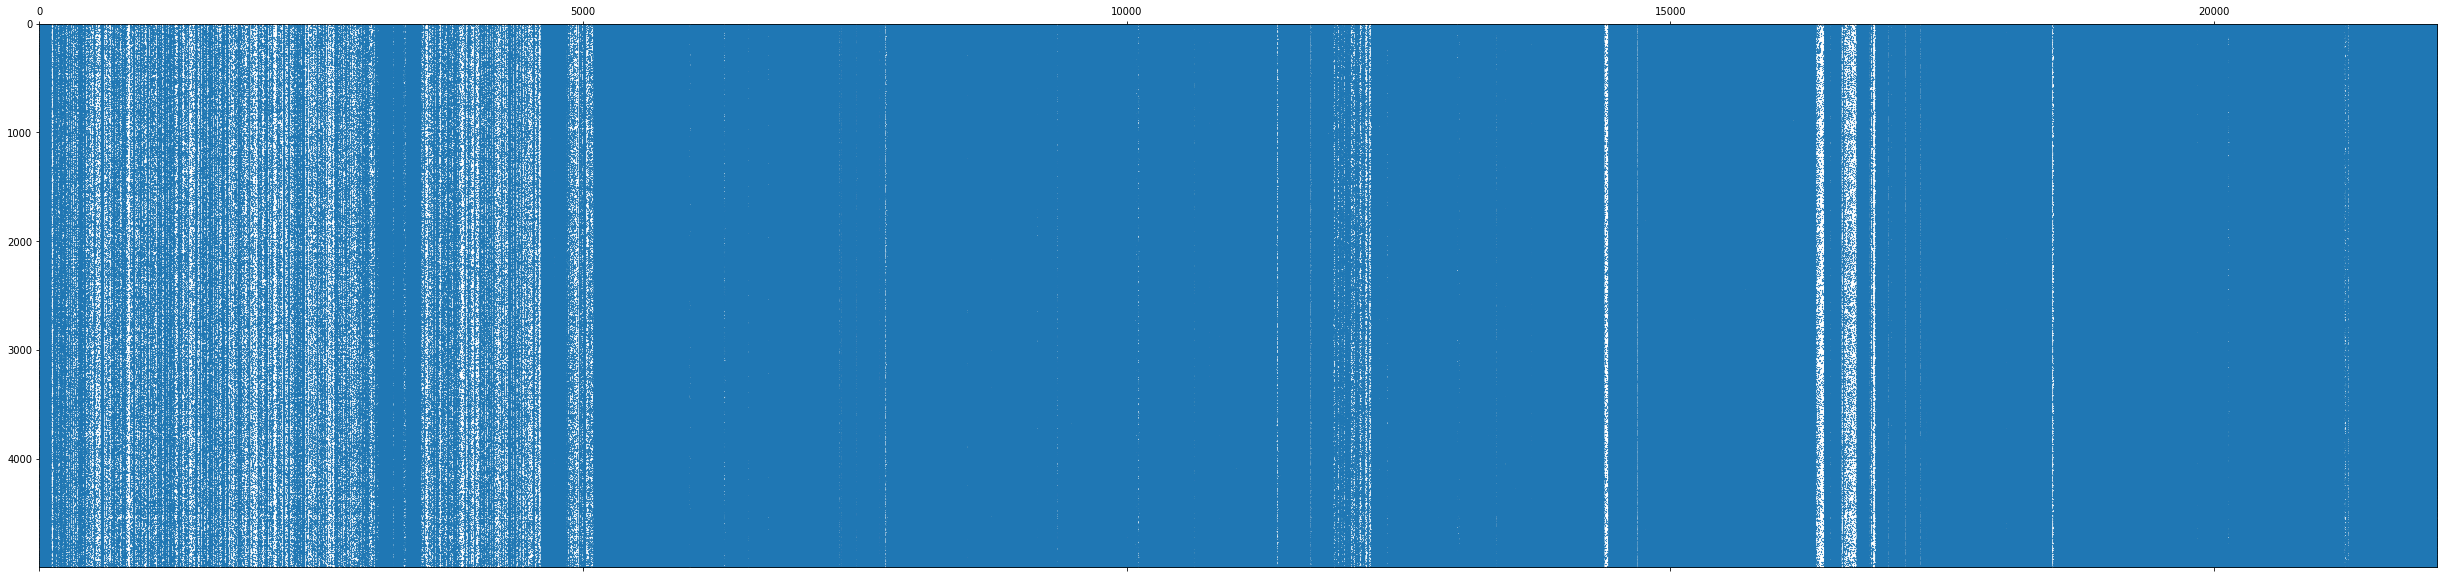

In [ ]:
#SParcity of the first 5000 rows from the unprocessed dataset (zero values correspond to white space)
plt.figure(figsize=(50, 10))
plt.spy(pd.DataFrame(df_cite_train_x[:5000]), markersize=0.25)
plt.show()

In [ ]:
#Reduce dimensions to 240, on 15 iterations
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=240, n_iter=15, random_state=42) #Setting random state to enable reproducibility

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_cite_train_x, df_cite_train_y.values, test_size=0.25, random_state=42) #splitting dataset into train and test sets

In [ ]:
x_train

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
4dae2bcbffad,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,3.790675,0.000000,0.000000,...,0.00000,0.000000,4.472468,0.000000,0.0,0.000000,0.000000,0.000000,3.790675,0.000000
713741f0756d,0.0,0.0,0.0,0.000000,0.0,0.0,4.392673,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,3.711818,0.0,0.000000,3.711818,3.711818,3.711818,0.000000
ba957f147433,0.0,0.0,0.0,3.510418,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,3.510418,4.188510,4.588907,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
150178a833d4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,3.94168,0.000000,0.000000,4.625072,0.0,0.000000,0.000000,0.000000,4.625072,0.000000
87a2014b6a14,0.0,0.0,0.0,0.000000,0.0,0.0,3.366277,0.000000,0.000000,0.000000,...,0.00000,3.366277,0.000000,5.282154,0.0,0.000000,0.000000,0.000000,4.042015,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cae57be0f4ad,0.0,0.0,0.0,0.000000,0.0,0.0,3.531597,0.000000,3.531597,4.210007,...,0.00000,0.000000,0.000000,4.210007,0.0,0.000000,3.531597,4.210007,4.610511,3.531597
d88adc3a662a,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,3.444742,...,4.52185,3.444742,3.444742,6.053718,0.0,3.444742,0.000000,4.121804,5.362917,0.000000
5418efcd9316,0.0,0.0,0.0,0.000000,0.0,0.0,3.537963,4.216467,0.000000,0.000000,...,0.00000,3.537963,0.000000,3.537963,0.0,0.000000,0.000000,0.000000,0.000000,4.216467


In [ ]:
cite_train_x = svd.fit_transform(x_train)
cite_test_x = svd.fit_transform(x_test)

cite_train_y = y_train.copy()

In [ ]:
print(cite_train_x.shape)

print(cite_test_x.shape)

# print(cite_train_y.shape)
# cite_train_y = pd.read_hdf(FP_CITE_TRAIN_TARGETS).values
# print(cite_train_y.shape)

(53241, 240)
(17747, 240)


In [ ]:
cite_train_x.shape[0] + cite_test_x.shape[0] #the number of cells still remain the same after decomposition 

70988

In [ ]:
pd.DataFrame(x_test)

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
05087626c594,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
125ec55d2513,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
e06dbb68288f,0.0,0.000000,0.0,0.0,0.0,0.0,4.118854,0.000000,0.0,4.118854,...,3.441839,3.441839,3.441839,4.518884,0.0,0.0,0.000000,0.000000,5.206565,0.000000
669ca48a9b48,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,5.314814,0.0,0.000000,...,0.000000,3.547348,3.547348,3.547348,0.0,0.0,0.000000,3.547348,4.626573,0.000000
23c0a69dec65,0.0,0.000000,0.0,0.0,0.0,0.0,4.356786,0.000000,0.0,0.000000,...,4.356786,0.000000,0.000000,5.733419,0.0,0.0,4.356786,0.000000,6.137805,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2dd706a85dd4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,3.355403,0.0,0.000000,...,0.000000,0.000000,0.000000,5.270947,0.0,0.0,0.000000,3.355403,4.030949,3.355403
1857fad635a7,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,3.831561,3.831561,3.831561,0.0,0.0,0.000000,3.831561,0.000000,0.000000
4baa9d603ba2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,3.808957,3.808957,0.000000,4.892678,0.0,0.0,0.000000,0.000000,3.808957,0.000000


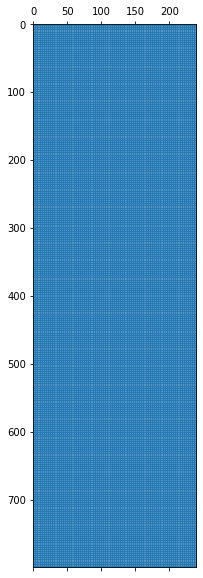

In [ ]:
#First 800 rows to see how uniformly distributed the values are in the dataset after SVD (less sparse)
plt.figure(figsize=(50, 10))
plt.spy(pd.DataFrame(cite_train_x[:800]), markersize=0.2)
plt.show()

In [ ]:
#Saving the training and testing datasets
pd.DataFrame(cite_train_x).to_csv('/content/drive/MyDrive/Genomic Info Sci Project (Fall \'22)/Datasets/processed_datasets/train_inputs_svd.csv')
pd.DataFrame(cite_test_x).to_csv('/content/drive/MyDrive/Genomic Info Sci Project (Fall \'22)/Datasets/processed_datasets/test_inputs_svd.csv')
pd.DataFrame(y_test).to_csv('/content/drive/MyDrive/Genomic Info Sci Project (Fall \'22)/Datasets/processed_datasets/test_targets.csv')
pd.DataFrame(y_train).to_csv('/content/drive/MyDrive/Genomic Info Sci Project (Fall \'22)/Datasets/processed_datasets/train_targets.csv')

## Model Build

In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os, gc, pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from colorama import Fore, Back, Style
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, Dataset

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
class CFG:
    tr_batch_size = 16 # 16
    va_batch_size = 128 # 32
    
    optimizer = "AdamW"
    lr = 1e-3
    weight_decay = 0.01
    betas = (0.9, 0.999)
    epochs = 25

In [ ]:
class CtieseqDataset(Dataset):
    """
    Train, Validation or Test dataset for CITEseq samples
    Prepares data for simple vector to vector NN
    """
    def __init__(self, X, y=None):
        self.train = False 
        if y is not None:
            self.train = True
        self.X = X
        self.y = y
            
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        X = self.X[idx]
        
        if self.train:
            y = self.y[idx]
            return {
                "X" : torch.tensor(X).to(device),
                "y" : torch.tensor(y).to(device)
            }
        else:
            return {
                "X" : torch.tensor(X).to(device)
            }

In [ ]:
def criterion(outputs, labels):
    """ MSE Loss function"""
    return nn.MSELoss()(outputs, labels)

def correlation_score(y_true, y_pred):
    """
    Scores the predictions according to the competition rules. 
    It is assumed that the predictions are not constant.
    Returns the average of each sample's Pearson correlation coefficient
    """
    
    if type(y_true) == pd.DataFrame: y_true = y_true.values
    if type(y_pred) == pd.DataFrame: y_pred = y_pred.values
    corrsum = 0
    for i in range(len(y_true)):
        corrsum += np.corrcoef(y_true[i], y_pred[i])[1, 0]
    return corrsum / len(y_true)

def get_optimizer(model, lr, weight_decay, betas):
    """ Gets AdamW optimizer """
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(
            nd in n for nd in no_decay)], 'weight_decay': weight_decay},
        {'params': [p for n, p in param_optimizer if any(
            nd in n for nd in no_decay)], 'weight_decay': 0.0}
    ]
    optimizer = AdamW(optimizer_grouped_parameters,
                      lr=lr,
                      weight_decay=weight_decay,
                      betas=betas,
                     )
    return optimizer

def get_scheduler(optimizer, T_max=300):
    """ Gets Consine scheduler """
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,
                                                           T_max=T_max)
    return scheduler

In [ ]:
class FCBlock(nn.Module):
    """
    A Pytorch Block for a fully connected Layer
    Includes Linear, Activation Function, and Dropout
    """
    def __init__(self, input_dim, hidden_dim, dropout):
        super().__init__()
        self.fc = nn.Linear(input_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        x = self.fc(x)
        x = F.selu(x)
        x = self.dropout(x)
        return x

class Encoder(nn.Module):
    """
    Encoder module to generate embeddings of a RNA vector
    """
    def __init__(self):
        super().__init__()
        self.l0 = FCBlock(240, 60, 0.05)
        # self.l1 = FCBlock(120, 60, 0.05)
        # self.l2 = FCBlock(60, 30, 0.05)
        
    def forward(self, x):
        x = self.l0(x)
        # x = self.l1(x)
        # x = self.l2(x)
        return x
    
class Decoder(nn.Module):
    """
    Decoder module to extract Protein sequences from RNA embeddings
    """
    def __init__(self):
        super().__init__()
        self.l0 = FCBlock(60, 140, 0.05)
        # self.l1 = FCBlock(70, 100, 0.05)
        # self.l2 = FCBlock(100, 140, 0.05)
        
    def forward(self, x):
        x = self.l0(x)
        # x = self.l1(x)
        # x = self.l2(x)
        return x
        
class CtieseqModel(nn.Module):
    """
    Wrapper for the Encoder and Decoder modules
    Converts RNA sequence to Protein sequence
    """
    def __init__(self):
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
        
    def forward(self, x):
        embeddings = self.encoder(x)
        outputs = self.decoder(embeddings)
        return outputs

In [ ]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [ ]:
def train_one_epoch(model, optimizer, scheduler, dataloader, device, epoch):
    """ Trains one epoch and returns loss """
    model.train()
    
    losses = AverageMeter()
    corr = AverageMeter()
    
    bar = tqdm(enumerate(dataloader), total=len(dataloader))
    for step, data in bar:
        X, y = data["X"], data["y"]
        
        batch_size = X.size(0)

        outputs = model(X)

        n = outputs.size(0)
        loss = criterion(outputs, y)
        losses.update(loss.item(), n)
        loss.backward()
        
        outputs = outputs.detach().cpu().numpy()
        y = y.detach().cpu().numpy()
        corr_score = correlation_score(y, outputs)
        corr.update(corr_score, n)
        
        optimizer.step()
        optimizer.zero_grad()

        if scheduler is not None:
            scheduler.step()
        
        bar.set_postfix(Epoch=epoch, Train_Loss=losses.avg, Corr=corr.avg,
                        LR=optimizer.param_groups[0]['lr'])
    gc.collect()
    
    return losses.avg

In [ ]:
@torch.no_grad()
def valid_one_epoch(model, optimizer, dataloader, device, epoch):
    """ Evaluates one epoch and returns loss """
    model.eval()
    
    losses = AverageMeter()
    corr = AverageMeter()
    
    bar = tqdm(enumerate(dataloader), total=len(dataloader))
    for step, data in bar:        
        X, y = data["X"], data["y"]
        
        batch_size = X.size(0)

        outputs = model(X)
        
        n = outputs.size(0)
        loss = criterion(outputs, y)
        losses.update(loss.item(), n)
        
        outputs = outputs.detach().cpu().numpy()
        y = y.detach().cpu().numpy()
        corr_score = correlation_score(y, outputs)
        corr.update(corr_score, n)
        
        bar.set_postfix(Epoch=epoch, Valid_Loss=losses.avg, Corr=corr.avg,
                        LR=optimizer.param_groups[0]['lr'])   
    
    gc.collect()
    
    return losses.avg

In [ ]:
def train_one_fold(model, 
                   optimizer, 
                   scheduler, 
                   train_loader, 
                   valid_loader, 
                   fold):
    """ Trains and saves a full fold of a pytorch model """
    best_epoch_loss = np.inf
    model.to(device)

    for epoch in range(CFG.epochs):
        gc.collect()
        train_epoch_loss = train_one_epoch(model, 
                                           optimizer, 
                                           scheduler, 
                                           dataloader=train_loader, 
                                           device=device, 
                                           epoch=epoch)

        val_epoch_loss = valid_one_epoch(model,
                                         optimizer, 
                                         valid_loader, 
                                         device=device, epoch=epoch)
        
        if val_epoch_loss <= best_epoch_loss:
            print(f"Validation Loss Improved ({best_epoch_loss} ---> {val_epoch_loss})")
            best_epoch_loss = val_epoch_loss
            torch.save(model.state_dict(), f"model_f{fold}.bin")
            
    print("Best Loss: {:.4f}".format(best_epoch_loss))

## Run Training

In [ ]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)
score_list = []
for fold, (idx_tr, idx_va) in enumerate(kf.split(cite_train_x)):
    print(f"\nfold = {fold}")
    X_tr = cite_train_x[idx_tr] 
    y_tr = cite_train_y[idx_tr]
    
    X_va = cite_train_x[idx_va]
    y_va = cite_train_y[idx_va]
    
    ds_tr = CtieseqDataset(X_tr, y_tr)
    ds_va = CtieseqDataset(X_tr, y_tr)
    dl_tr = DataLoader(ds_tr, batch_size=CFG.tr_batch_size, shuffle=True)
    dl_va = DataLoader(ds_va, batch_size=CFG.va_batch_size, shuffle=False)
    
    model = CtieseqModel()
    optimizer = get_optimizer(model, CFG.lr, CFG.weight_decay, CFG.betas)
    scheduler = get_scheduler(optimizer) 

    train_one_fold(model, optimizer, scheduler, dl_tr, dl_va, fold)
    # model.save(f"/content/drive/MyDrive/Genomic Info Sci Project (Fall '22)/SVD_CITEseq_Models/model_{fold}")


fold = 0


100%|██████████| 278/278 [00:05<00:00, 47.30it/s, Corr=0.888, Epoch=0, LR=0.000341, Valid_Loss=2.69]


Validation Loss Improved (inf ---> 2.6920998058446988)


100%|██████████| 278/278 [00:05<00:00, 46.51it/s, Corr=0.892, Epoch=1, LR=0.000102, Valid_Loss=2.59]


Validation Loss Improved (2.6920998058446988 ---> 2.5892181631315996)


100%|██████████| 278/278 [00:05<00:00, 47.62it/s, Corr=0.894, Epoch=3, LR=0.000634, Valid_Loss=2.57]


Validation Loss Improved (2.5892181631315996 ---> 2.568950221848473)


100%|██████████| 278/278 [00:05<00:00, 48.08it/s, Corr=0.895, Epoch=4, LR=6.85e-7, Valid_Loss=2.51]


Validation Loss Improved (2.568950221848473 ---> 2.5107648237098026)


100%|██████████| 278/278 [00:05<00:00, 47.91it/s, Corr=0.896, Epoch=7, LR=7.23e-5, Valid_Loss=2.47]


Validation Loss Improved (2.5107648237098026 ---> 2.4720658350375064)


100%|██████████| 278/278 [00:05<00:00, 47.17it/s, Corr=0.896, Epoch=8, LR=0.000391, Valid_Loss=2.46]


Validation Loss Improved (2.4720658350375064 ---> 2.4578406676820497)


100%|██████████| 278/278 [00:05<00:00, 47.74it/s, Corr=0.896, Epoch=13, LR=0.000583, Valid_Loss=2.41]


Validation Loss Improved (2.4578406676820497 ---> 2.4083452707291615)


100%|██████████| 278/278 [00:05<00:00, 47.47it/s, Corr=0.897, Epoch=20, LR=0.000245, Valid_Loss=2.39]


Validation Loss Improved (2.4083452707291615 ---> 2.3852806220412246)


100%|██████████| 278/278 [00:05<00:00, 47.40it/s, Corr=0.897, Epoch=24, LR=1.7e-5, Valid_Loss=2.38]


Validation Loss Improved (2.3852806220412246 ---> 2.379019883032711)
Best Loss: 2.3790

fold = 1


100%|██████████| 278/278 [00:05<00:00, 47.91it/s, Corr=0.889, Epoch=0, LR=0.000341, Valid_Loss=2.67]


Validation Loss Improved (inf ---> 2.673288702716248)


100%|██████████| 278/278 [00:05<00:00, 47.92it/s, Corr=0.892, Epoch=1, LR=0.000102, Valid_Loss=2.6]


Validation Loss Improved (2.673288702716248 ---> 2.599719917820549)


100%|██████████| 278/278 [00:05<00:00, 47.05it/s, Corr=0.892, Epoch=2, LR=0.000914, Valid_Loss=2.59]


Validation Loss Improved (2.599719917820549 ---> 2.594985645227233)


100%|██████████| 278/278 [00:05<00:00, 47.22it/s, Corr=0.895, Epoch=3, LR=0.000634, Valid_Loss=2.51]


Validation Loss Improved (2.594985645227233 ---> 2.5109089344341924)


100%|██████████| 278/278 [00:05<00:00, 47.95it/s, Corr=0.895, Epoch=4, LR=6.85e-7, Valid_Loss=2.48]


Validation Loss Improved (2.5109089344341924 ---> 2.483342267361709)


100%|██████████| 278/278 [00:05<00:00, 46.43it/s, Corr=0.895, Epoch=6, LR=0.000882, Valid_Loss=2.47]


Validation Loss Improved (2.483342267361709 ---> 2.472184195655255)


100%|██████████| 278/278 [00:06<00:00, 46.30it/s, Corr=0.896, Epoch=7, LR=7.23e-5, Valid_Loss=2.45]


Validation Loss Improved (2.472184195655255 ---> 2.451976899517122)


100%|██████████| 278/278 [00:05<00:00, 46.70it/s, Corr=0.895, Epoch=8, LR=0.000391, Valid_Loss=2.45]


Validation Loss Improved (2.451976899517122 ---> 2.449878092449457)


100%|██████████| 278/278 [00:05<00:00, 48.52it/s, Corr=0.896, Epoch=10, LR=0.000292, Valid_Loss=2.44]


Validation Loss Improved (2.449878092449457 ---> 2.441784862989156)


100%|██████████| 278/278 [00:05<00:00, 47.17it/s, Corr=0.895, Epoch=12, LR=0.000941, Valid_Loss=2.43]


Validation Loss Improved (2.441784862989156 ---> 2.4290355106686286)


100%|██████████| 278/278 [00:05<00:00, 46.57it/s, Corr=0.895, Epoch=13, LR=0.000583, Valid_Loss=2.41]


Validation Loss Improved (2.4290355106686286 ---> 2.405008453083366)


100%|██████████| 278/278 [00:05<00:00, 47.08it/s, Corr=0.896, Epoch=14, LR=6.16e-6, Valid_Loss=2.4]


Validation Loss Improved (2.405008453083366 ---> 2.4010947418057054)


100%|██████████| 278/278 [00:05<00:00, 46.71it/s, Corr=0.897, Epoch=17, LR=4.76e-5, Valid_Loss=2.39]


Validation Loss Improved (2.4010947418057054 ---> 2.390702274770356)


100%|██████████| 278/278 [00:05<00:00, 48.17it/s, Corr=0.897, Epoch=20, LR=0.000245, Valid_Loss=2.38]


Validation Loss Improved (2.390702274770356 ---> 2.3810627398413255)


100%|██████████| 278/278 [00:05<00:00, 46.74it/s, Corr=0.897, Epoch=21, LR=0.000173, Valid_Loss=2.38]


Validation Loss Improved (2.3810627398413255 ---> 2.377030095214702)


100%|██████████| 278/278 [00:06<00:00, 45.45it/s, Corr=0.897, Epoch=23, LR=0.000531, Valid_Loss=2.36]


Validation Loss Improved (2.377030095214702 ---> 2.362447110526614)


100%|██████████| 278/278 [00:05<00:00, 47.00it/s, Corr=0.897, Epoch=24, LR=1.7e-5, Valid_Loss=2.39]


Best Loss: 2.3624

fold = 2


100%|██████████| 278/278 [00:05<00:00, 47.28it/s, Corr=0.889, Epoch=0, LR=0.000341, Valid_Loss=2.72]


Validation Loss Improved (inf ---> 2.720849250319065)


100%|██████████| 278/278 [00:05<00:00, 47.44it/s, Corr=0.892, Epoch=1, LR=0.000102, Valid_Loss=2.58]


Validation Loss Improved (2.720849250319065 ---> 2.576499506554926)


100%|██████████| 278/278 [00:05<00:00, 47.75it/s, Corr=0.894, Epoch=3, LR=0.000634, Valid_Loss=2.51]


Validation Loss Improved (2.576499506554926 ---> 2.5131218822706236)


100%|██████████| 278/278 [00:05<00:00, 47.58it/s, Corr=0.895, Epoch=4, LR=6.85e-7, Valid_Loss=2.51]


Validation Loss Improved (2.5131218822706236 ---> 2.5080110716162825)


100%|██████████| 278/278 [00:05<00:00, 46.77it/s, Corr=0.895, Epoch=6, LR=0.000882, Valid_Loss=2.47]


Validation Loss Improved (2.5080110716162825 ---> 2.4664092129731894)


100%|██████████| 278/278 [00:05<00:00, 47.35it/s, Corr=0.896, Epoch=10, LR=0.000292, Valid_Loss=2.42]


Validation Loss Improved (2.4664092129731894 ---> 2.421331451867086)


100%|██████████| 278/278 [00:06<00:00, 46.27it/s, Corr=0.897, Epoch=13, LR=0.000583, Valid_Loss=2.41]


Validation Loss Improved (2.421331451867086 ---> 2.413501021183195)


100%|██████████| 278/278 [00:06<00:00, 46.00it/s, Corr=0.897, Epoch=14, LR=6.16e-6, Valid_Loss=2.4]


Validation Loss Improved (2.413501021183195 ---> 2.401235922797402)


100%|██████████| 278/278 [00:05<00:00, 46.73it/s, Corr=0.896, Epoch=16, LR=0.000846, Valid_Loss=2.39]


Validation Loss Improved (2.401235922797402 ---> 2.392830139577587)


100%|██████████| 278/278 [00:05<00:00, 46.57it/s, Corr=0.897, Epoch=17, LR=4.76e-5, Valid_Loss=2.39]


Validation Loss Improved (2.392830139577587 ---> 2.3902186748242187)


100%|██████████| 278/278 [00:06<00:00, 46.18it/s, Corr=0.897, Epoch=18, LR=0.000443, Valid_Loss=2.38]


Validation Loss Improved (2.3902186748242187 ---> 2.377539577057995)


100%|██████████| 278/278 [00:05<00:00, 47.60it/s, Corr=0.897, Epoch=20, LR=0.000245, Valid_Loss=2.37]


Validation Loss Improved (2.377539577057995 ---> 2.368643548392293)


 14%|█▍        | 306/2219 [00:01<00:11, 163.90it/s, Corr=0.863, Epoch=23, LR=9.24e-5, Train_Loss=3.08]

In [ ]:
cite_test_x = svd.fit_transform(x_test)

In [ ]:
def predict(fold):
    preds = list()
    ds = CtieseqDataset(cite_test_x)
    dl = DataLoader(ds, batch_size=32, shuffle=False)
    model = CtieseqModel()
    model.load_state_dict(torch.load(f"model_f{fold}.bin"))
    model.eval()

    bar = tqdm(enumerate(dl), total=len(dl))
    for step, data in bar:        
        X = data["X"]

        batch_size = X.size(0)

        model = model.to(device)
        outputs = model(X)
        preds.append(outputs.detach().cpu().numpy())
    test_pred = np.concatenate(preds)
    return test_pred

In [ ]:
test_preds_0 = np.array(predict(0))
test_preds_1 = np.array(predict(1))
# test_preds_2 = np.array(predict(2))
# test_preds = np.mean(test_preds, axis=0)
# print(test_preds.shape)

100%|██████████| 555/555 [00:00<00:00, 805.49it/s]


In [ ]:
test_preds_2 = np.array(predict(2))

100%|██████████| 555/555 [00:00<00:00, 809.81it/s]


In [ ]:
print(test_preds_2.shape)

(17747, 140)


In [ ]:
pd.DataFrame(test_preds_2)

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,0.724477,0.571307,0.763292,3.966560,3.367842,4.759242,1.042440,0.197004,0.682980,0.247560,...,0.290171,7.132896,0.991152,0.295330,0.164421,0.475824,4.680614,0.808846,4.108975,2.790024
1,0.537887,0.453165,0.836693,5.411850,5.457666,6.558323,3.250269,0.272185,0.606412,1.194520,...,0.326098,6.864778,0.738950,0.346376,0.181572,0.806753,4.479429,0.869187,2.969775,3.180474
2,0.743230,0.181436,0.536256,5.771855,5.730010,6.114129,11.626034,-0.089957,0.358378,0.371890,...,0.185160,7.972629,0.412024,0.144458,0.086058,0.344099,2.610440,0.672539,1.998110,2.855493
3,0.655498,0.815361,1.375932,6.984735,6.609751,12.483639,6.321018,0.312776,1.153922,1.611971,...,0.631940,9.437773,1.342635,0.629931,0.319494,1.242669,6.210102,1.302779,4.062253,5.491397
4,3.317346,0.742053,1.112711,6.026775,5.939290,8.178933,12.652280,0.410575,0.686119,1.642395,...,0.378245,7.751965,0.625745,0.388149,7.059283,0.678752,2.149055,6.036998,1.416993,4.544721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17742,0.521524,0.485681,1.109328,6.195558,3.940933,6.124822,1.780862,0.081480,0.982477,0.542124,...,0.344557,8.621363,1.527223,0.089133,0.257967,0.760787,7.171516,0.617969,6.720472,3.958694
17743,0.938950,0.712321,1.008518,6.911335,6.155939,8.852416,7.543561,0.341754,0.683255,1.306492,...,0.415945,8.231134,0.792233,0.516819,0.430389,0.796507,7.208367,1.057376,2.355507,4.724080
17744,0.845227,0.599282,1.139719,5.685811,4.517685,8.696433,4.223182,0.428417,0.971619,1.074223,...,0.514524,7.542005,1.060370,0.499684,0.925333,1.078804,5.987838,2.146544,3.522154,4.502649
17745,0.638715,0.430641,0.956110,7.513388,7.385180,9.887328,9.957876,0.026889,0.682234,1.003520,...,0.450367,7.802528,0.783590,0.437003,0.174098,0.791563,3.145590,0.760707,2.670450,3.842799


In [ ]:
rms = np.sqrt(mean_squared_error(y_test, test_preds_2))

In [ ]:
rms

2.06541

In [ ]:
def predict(fold):
    preds = list()
    ds = CtieseqDataset(cite_test_x)
    dl = DataLoader(ds, batch_size=32, shuffle=False)
    model = CtieseqModel()
    model.load_state_dict(torch.load(f"model_f{fold}.bin"))
    model.eval()

    bar = tqdm(enumerate(dl), total=len(dl))
    for step, data in bar:        
        X = data["X"]

        batch_size = X.size(0)
        model = model.to(device)
        outputs = model(X.cuda())
        preds.append(outputs.detach().cpu().numpy())
    test_pred = np.concatenate(preds)
    return test_pred

In [ ]:
test_preds = np.array([predict(0), predict(1), predict(2)])
test_preds = np.mean(test_preds, axis=0)
print(test_preds.shape)

100%|██████████| 63/63 [00:00<00:00, 922.94it/s]

(2000, 140)


In [ ]:
test_preds_svd_df = pd.DataFrame(test_preds_svd)

In [ ]:
svd_means = pd.DataFrame(test_preds)

In [ ]:
test_preds_pca = np.array(predict(1))
test_preds_pca_df = pd.DataFrame(test_preds_pca)

100%|██████████| 2219/2219 [00:03<00:00, 634.37it/s]


In [ ]:
test_preds_pca_mean = np.mean(test_preds_pca, axis=0)
pca_means = pd.DataFrame(test_preds_pca_mean)

In [ ]:
test_prediction_df = pd.DataFrame(list(zip(svd_means[0], pca_means[0])), columns = {'PCA', 'SVD'})

In [ ]:
test_prediction_df

,SVD,PCA
0,0.442488,0.642668
1,0.436354,0.608950
2,0.872300,1.709345
3,5.320384,8.015347
4,5.057283,8.579666
...,...,...
135,0.742951,0.748407
136,5.082714,4.756767
137,0.599978,1.254802
138,3.454911,2.208334


In [ ]:
torch.save({
            'epoch': 25,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': 2.6814,
            }, '/content/drive/MyDrive/Genomic Info Sci Project (Fall \'22)/SVD_CITEseq_Models/enc_dec_240_60_140_model_f2.bin')

## Regression

In [ ]:
import pandas as pd

In [ ]:
x_train = pd.read_csv('/content/drive/MyDrive/Genomic Info Sci Project (Fall \'22)/Datasets/processed_datasets/train_inputs_svd.csv')
x_test = pd.read_csv('/content/drive/MyDrive/Genomic Info Sci Project (Fall \'22)/Datasets/processed_datasets/test_inputs_svd.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Genomic Info Sci Project (Fall \'22)/Datasets/processed_datasets/test_targets.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Genomic Info Sci Project (Fall \'22)/Datasets/processed_datasets/train_targets.csv')

In [ ]:
x_train = x_train.drop(['Unnamed: 0'], axis = 1)
x_test = x_test.drop(['Unnamed: 0'], axis = 1)
y_train = y_train.drop(['Unnamed: 0'], axis = 1)
y_test = y_test.drop(['Unnamed: 0'], axis = 1)

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.05, normalize=True)

In [ ]:
pred = ridgeReg.predict(x_test)
rms = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE for Ridge Regression', rms)

r2 = r2_score(y_test, pred)
print('R2 score Ridge Regression:', r2)

RMSE for Ridge Regression 2.0946541811722934
R2 score Ridge Regression: -0.010185795903338797


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=1, normalize=False)

ENreg.fit(x_train,y_train)

pred = ENreg.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [ ]:
rms = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE for ElasticNet Regression', rms)

r2 = r2_score(y_test, pred)
print('R2 score ElasticNet Regression:', r2)

RMSE for ElasticNet Regression 2.0485978737030432
R2 score ElasticNet Regression: 0.023261450768918886


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [ ]:
rms = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE for Lasso Regression', rms)

r2 = r2_score(y_test, pred)
print('R2 score Lasso Regression:', r2)

RMSE for Lasso Regression 2.1986514464924416
R2 score Lasso Regression: -9.245079700747695e-05
